In [11]:
from specialist_data import get_stage

X_train, X_test, y_train, y_test = get_stage('total')

In [12]:
from sklearn.svm import SVC
import pickle

clf = SVC(kernel="sigmoid", verbose=True)
clf = clf.fit(X_train, y_train)

filename = 'svm_classifier.sav'
pickle.dump(clf, open(filename, 'wb'))

[LibSVM].......
*
optimization finished, #iter = 7709
obj = -1914525.149354, rho = -9.083771
nSV = 13203, nBSV = 13201
Total nSV = 13203


0.4939981532779317


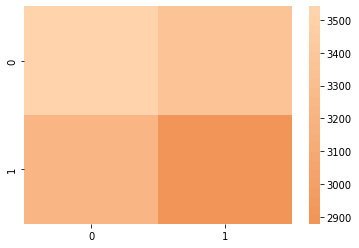

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cfl = pickle.load(open(filename, 'rb'))
result = cfl.score(X_test, y_test)
print(result)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True)
plt.show()